This code has been written by Javier Bravo, Lead Reservoir Engineer at Tullow Oil. 

Please answer the questions in separate cells between the code. There are two types of questions: questions related to the code and questions related to interpreting the results.

If you have coded a lot, you don't need to answer the questions related to code (e.g., what is numpy, pandas, seaborn).



<h2><center>Exercise 1A, Crude oil markets

In [1]:
# Start loading libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline


We import Python libraries. What are numpy, pandas and seaborn?

In [8]:
# Read oil price and transform data

xls_file=pd.ExcelFile("data_oil_2024/RBRTEd.xlsx") # Read Excel
brent=xls_file.parse("Data 1") # Read sheet Data 1
brent.columns=brent.iloc[1] # set row 1 as column name
brent=brent.iloc[2:] 
brent["Date"]=brent["Date"].astype('datetime64[ns]') # Convert column to date format
brent.columns=["date","oil_price"]
brent.head()

,date,oil_price
2,1987-05-20,18.63
3,1987-05-21,18.45
4,1987-05-22,18.55
5,1987-05-25,18.6
6,1987-05-26,18.63


Please note from here how an excel file is imported as well as the conversion of the columns to date format. Explain the line 8: "brent["Date"]=brent["Date"].astype('datetime64[ns]')"
When do you write xx.head()?

In [9]:
# Loop to read all share price files and transform data
shares=["RDSB.L","BP.L","CNE.L","PMO.L","STL.OL","FP.PA","REP.MC","ENGI.PA","SLB.PA"]

all_data=pd.DataFrame() # here we will store all the data from all shares and oil price in a master dataframe
for index in range(len(shares)):
    stock=pd.DataFrame()

# 1.- Read files
    stock=pd.read_csv("data_oil_2024/"+shares[index]+".csv")     
    
# 2.- Transform data
    stock=stock[["Date","Close"]]       
    stock["Date"]=stock["Date"].astype('datetime64[ns]')
    stock.columns=["date","share_price"]
    test=pd.DataFrame(brent) # VLOOKUP equivalent in Python to merge 2 sets of data
    output=stock.merge(test,on="date",how="left")
    stock["oil_price"]=output["oil_price"]
    stock['share_price']=pd.to_numeric(stock['share_price'], errors='coerce').dropna()
    stock['oil_price']=pd.to_numeric(stock['oil_price'], errors='coerce').dropna()
    stock["year"]=pd.to_datetime(stock["date"]).dt.year # Create a column with the year to filter later
    stock["name"]=shares[index]
    stock = stock.dropna() # get rid of all the NAN rows.
    
# 3.- Feature Engineering. Create new column with scaled share price from 0 to 1.
#     This will help us comparing companies later on.
    from sklearn.preprocessing import MinMaxScaler
    scaler=MinMaxScaler()
    stock["share_price_scaled"]=scaler.fit_transform(stock["share_price"].to_frame())

    # 4.- Append data to a master dataframe
    all_data=pd.concat([all_data,stock]) #append data to one matrix
    
all_data.head()

,date,share_price,oil_price,year,name,share_price_scaled
0,2000-05-15,1193.597412,28.26,2000,RDSB.L,0.309123
1,2000-05-16,1191.409302,28.78,2000,RDSB.L,0.307755
2,2000-05-17,1164.911255,28.40,2000,RDSB.L,0.291187
3,2000-05-18,1204.315063,28.90,2000,RDSB.L,0.315824
4,2000-05-19,1215.334106,29.01,2000,RDSB.L,0.322714


What are the shares RDSB.L","BP.L","CNE.L","PMO etc? (line 2) 

Above, we 1. read the data, 2. transformed it, 3. did Feature engineering, and 4. appended the data in a master dataframe. In 3. Feature engineering, we used the algorithm MinMaxScaler. Search 'scikit-learng.org MinMaxScaler' and explain briefly what the MinMaxScaler estimator does.

MinMaxScaler : 

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one

<Axes: xlabel='date'>

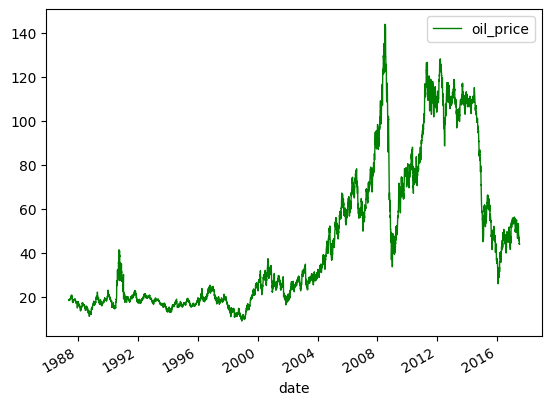

In [10]:
brent[['date','oil_price']].set_index('date').plot(color="green", linewidth=1.0)  

What happened year 2008? Explain the reason in one sentence. Can you explain the reason for the price fluctuations between 2012 and 2018? 

There was the 2008 financial crisis due to subprime mortgage  crisis and the collapse of american housing leading to a huge economic recession and many businesses going bankrupt.

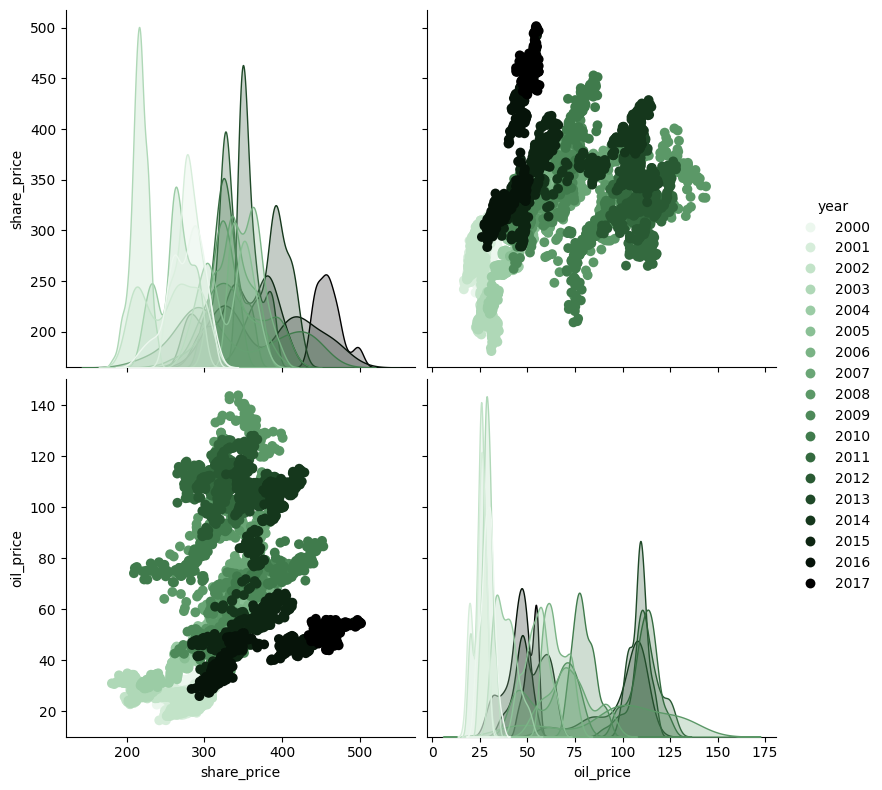

In [12]:
#==============================================================================
# Pairplot using master data table (all_data) with a filter on BP share price
#==============================================================================
palette=sns.cubehelix_palette(18, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.pairplot(all_data[all_data['name']=="BP.L"].drop(["share_price_scaled"],axis=1),
             hue="year",palette=palette,size=4,markers="o",
             plot_kws=dict(s=50, edgecolor="b", linewidth=0))

What can you say about the ratio share price/oil price in 2017 compared to the same ratio in 2000?

the ratio share price/oil price is higher in 2017, which means that markets value more the company that their underlying.

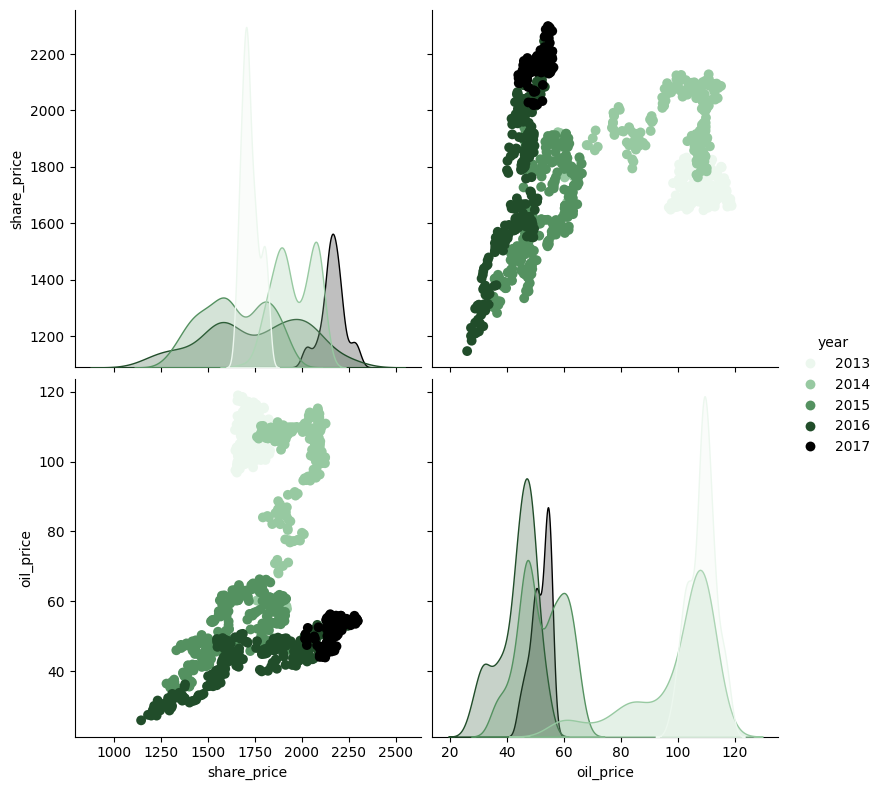

In [13]:
#==============================================================================
# Pairplot on less data 2013 to 2017 using Royal Dutch Shell (LON) stock price
#==============================================================================

# Just for the last 5 years
all_data13=all_data[all_data["year"]>2012]
palette=sns.cubehelix_palette(5, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.pairplot(all_data13[all_data13['name']=="RDSB.L"].drop(["share_price_scaled"],axis=1),
             hue="year",palette=palette,size=4,markers="o",
             plot_kws=dict(s=50, edgecolor="b", linewidth=0))

Analyse the pictures and compare to information on the oil price (previous cell) 

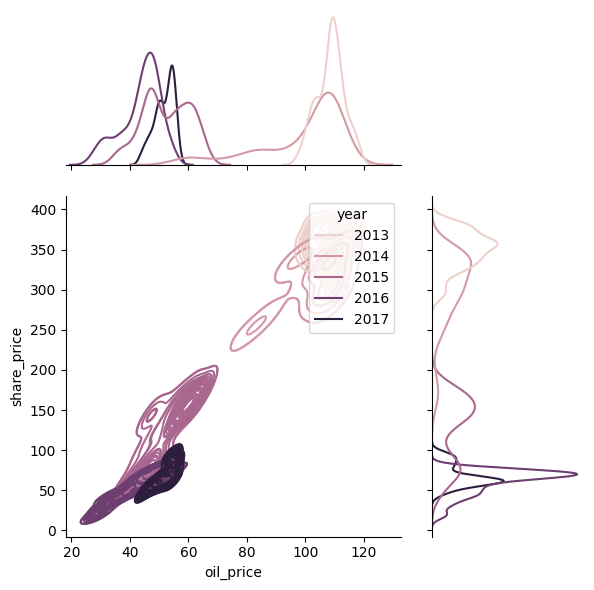

In [14]:
#==============================================================================
# joint plot using 5 years for Premier Oil
#==============================================================================

sns.jointplot(data=all_data13[all_data13['name']=="PMO.L"],x="oil_price",y= "share_price",kind="kde",
              hue="year",size=6,ratio=2,color="red").plot_joint(sns.kdeplot, zorder=0, n_levels=20)
              
#sns.jointplot("oil_price", "share_price",data=all_data13[all_data13['name']=="PMO.L"],kind="kde",
#              hue="year",size=6,ratio=2,color="red").plot_joint(sns.kdeplot, zorder=0, n_levels=20)

The ratio PMO share price/oil price looks linear. Try some other oil companies (BP, FP.PA etc). The share price/oil price ratio is not linear for all companies. Additional question: Do you have any idea on why the share price/oil price ratio is so different for different companies?
Other companies might not be exposed as much to oil than PMO, which is a direct producers, their shar might depent on other things. Companies like Shell have massive internal trading house, they can make money on volatility even though the oil price do not change that much.

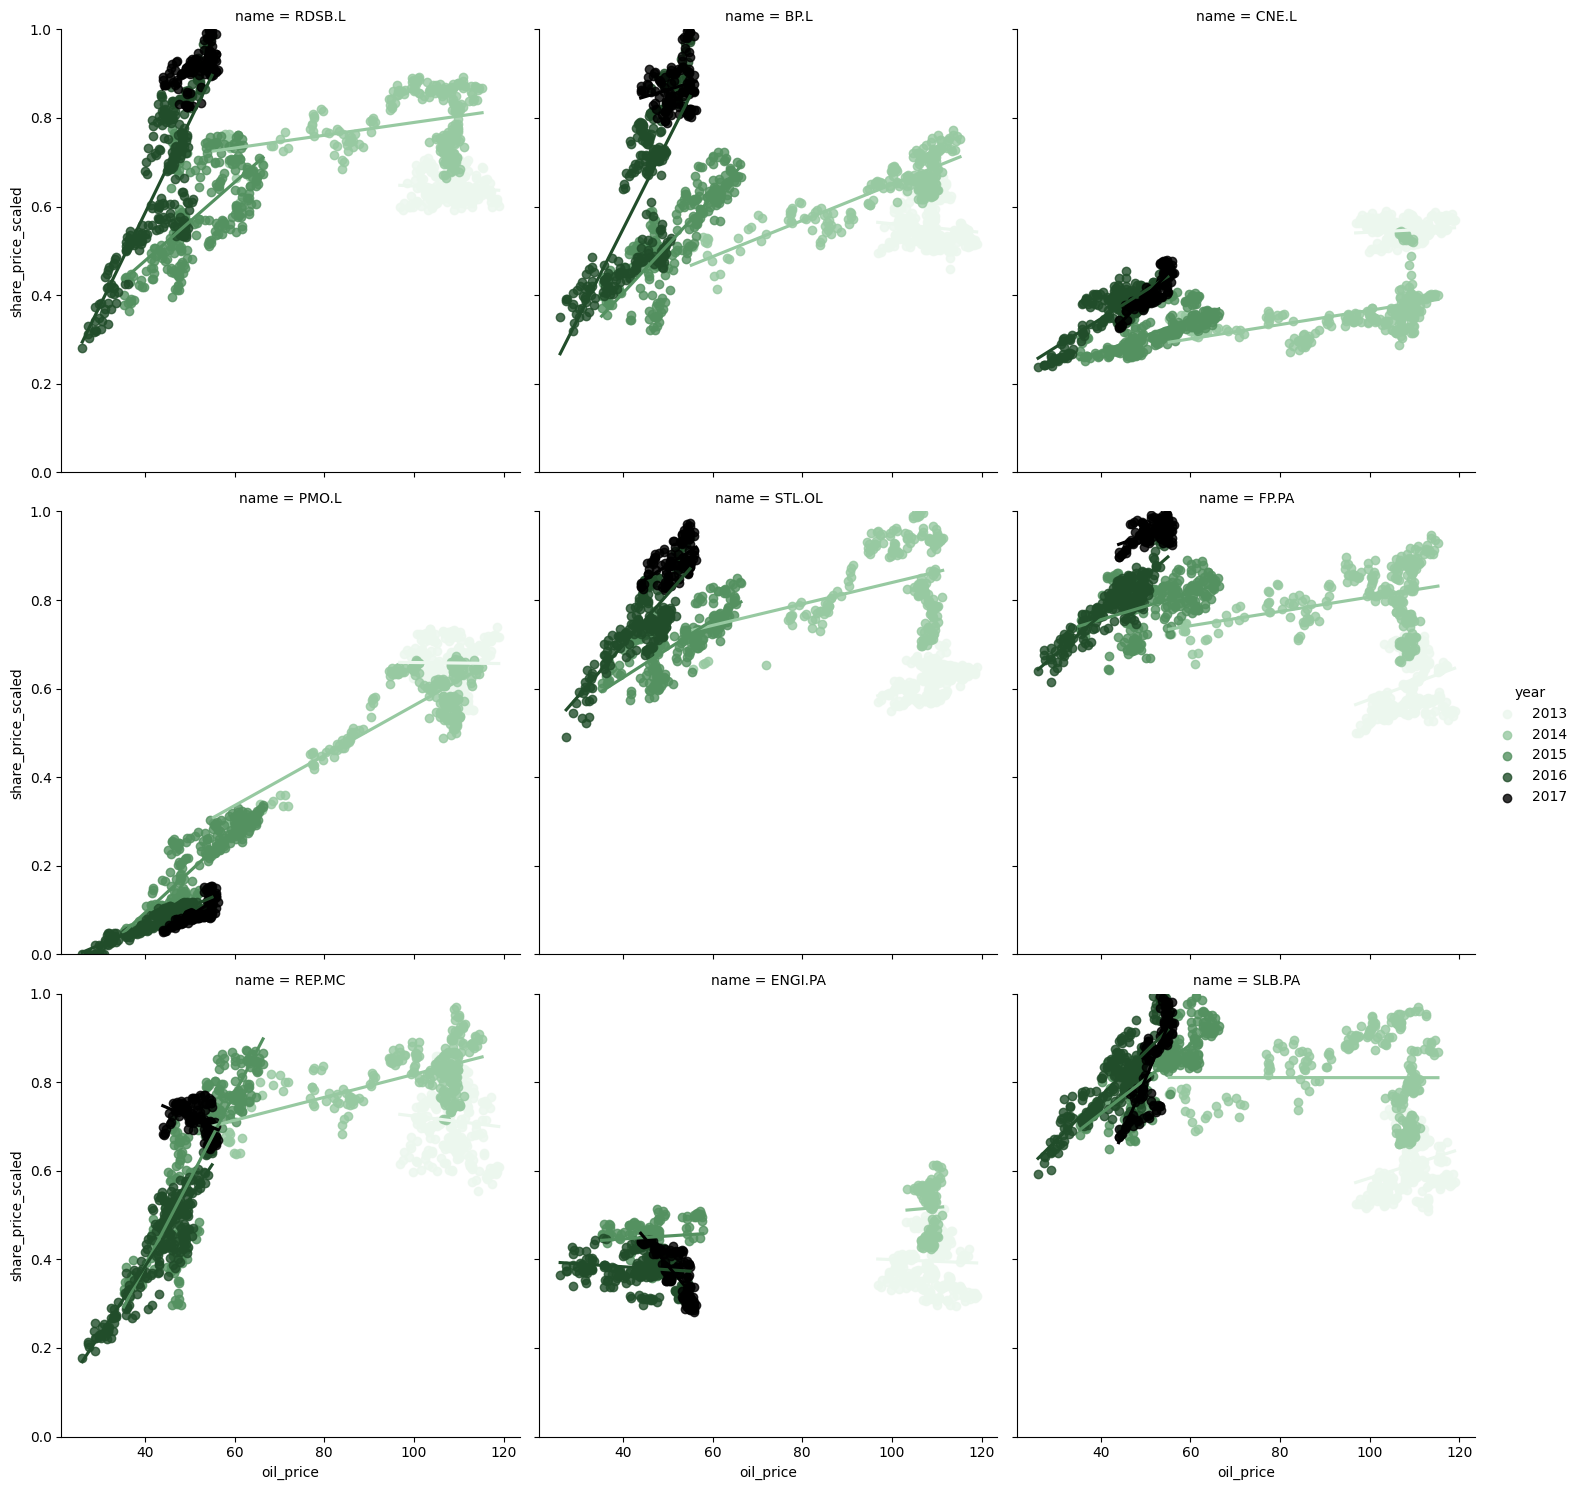

In [15]:
palette=sns.cubehelix_palette(5, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.lmplot(x="oil_price", y="share_price_scaled",hue="year", col="name",ci=None, 
           col_wrap=3, data=all_data13, order=1,palette=palette).set(ylim=(0, 1))

In some years, the share price has been sensitive to changes in the oil price. Which years? In some other years, the share price has not been sensitive to changes in the oil price. Which years?

Next, we analyse the data using unsupervised learnign and clustering.

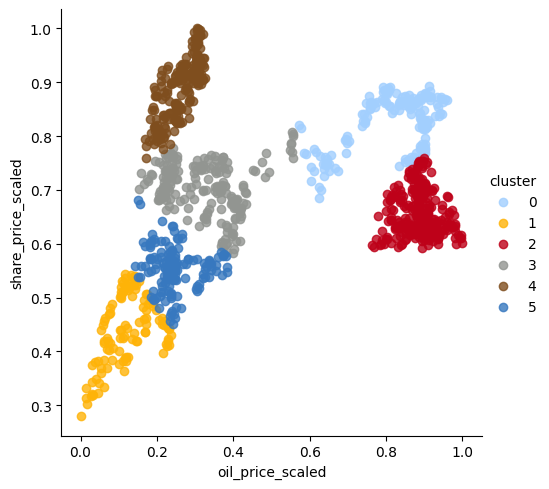

In [17]:
#==============================================================================
# Unsupervised Learning - Cluster analysis on Shell data
#==============================================================================
from sklearn.cluster import KMeans

shell=pd.DataFrame()
shell=all_data13[all_data13['name']=="RDSB.L"]
# We need to scale also oil price, so clustering is not influenced by the relative size of one axis.
shell["oil_price_scaled"]=scaler.fit_transform(shell["oil_price"].to_frame())
shell["cluster"] = KMeans(n_clusters=6, random_state=1).fit_predict(shell[["share_price_scaled","oil_price_scaled"]])

# The 954 most common RGB monitor colors https://xkcd.com/color/rgb/
colors = ["baby blue", "amber", "scarlet", "grey","milk chocolate", "windows blue"]
palette=sns.xkcd_palette(colors)

sns.lmplot(x="oil_price_scaled", y="share_price_scaled",ci=None,palette=palette, hue="cluster",fit_reg=0 ,data=shell)

Clustering is the task of grouping a set of objects in such a way that objects in the same group are more similar to each other than to those in other groups.
Here, we have clustered the ratio share price/oil price of the RDSB company (Shell). Plot the correponding cluster of another company that you guess could be different. 
Compare this picture to the pair-plot pictures above. If we are interested in searching oil companies whose stock price is dependent or independent of the oil price, we might prefer pair-plots. Later, we will see more intuitive applications of clustering financial data.

Next, we analyse the data using supervised methods.

In [18]:
#==============================================================================
# 
#==============================================================================

from sklearn import linear_model

# 1.- Data preparation
shell15=pd.DataFrame()
shell15=all_data13[(all_data13['name']=="RDSB.L") & (all_data13['year']>2015 )] # Extract data from years 2016/17
shell15=shell15[["share_price","oil_price"]].reset_index()


# Split the data into training/testing sets
train = shell15[:-100]
test = shell15[-100:]

x_train=train["oil_price"].to_frame() #converts the pandas Series to numpy.ndarray
y_train=train['share_price'].to_frame()
x_test=test["oil_price"].to_frame() #converts the pandas Series to numpy.ndarray
y_test=test['share_price'].to_frame()

# 2.- Create linear regression object
regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)

# The coefficients
print("Coefficients: ",  float(regr.coef_))
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_train) - y_train) ** 2))

Coefficients:  35.25408169124279
Mean squared error: 23210.67


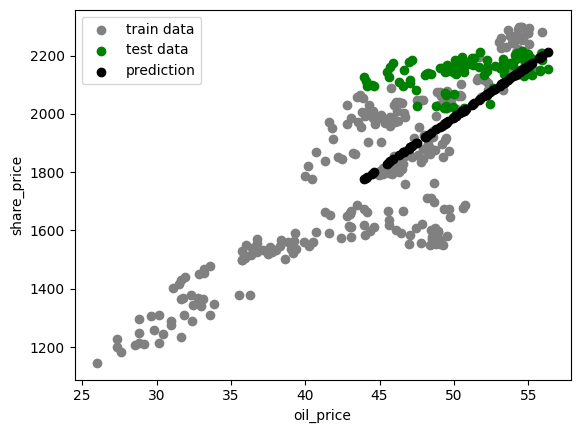

In [27]:
# Plot outputs using matplotlib
plt_train=plt.scatter(x_train, y_train,  color='grey')
plt_test=plt.scatter(x_test, y_test,  color='green')
plt_pred=plt.scatter(x_test, y_pred,  color='black')
plt.xlabel("oil_price")
plt.ylabel("share_price")
plt.legend((plt_train, plt_test, plt_pred),("train data", "test data", "prediction"))
plt.show()

We have here plotted the train data (grey), the test data (green) and a prediction (black). When looking at the picture, how would you analyze the prediction? How well does it fit the test data? How consistent is it with the train data?

Next, we try random forest regression. This time, we can use simultaneously the data of several companies.

In [28]:
from sklearn.ensemble import RandomForestRegressor
# 1.- Data Preparation
shell15=pd.DataFrame()
shell15=all_data13[(all_data13['name']=="RDSB.L") & (all_data13['year']>2015 )]
shell15=shell15[["share_price","oil_price"]].reset_index()

# Load share price of other variables
shell15['PMO.L']=all_data13[(all_data13['name']=="PMO.L")][-373:].reset_index()['share_price']
shell15['CNE.L']=all_data13[(all_data13['name']=="CNE.L")][-373:].reset_index()['share_price']
shell15['FP.PA']=all_data13[(all_data13['name']=="FP.PA")][-373:].reset_index()['share_price']
shell15['ENGI.PA']=all_data13[(all_data13['name']=="ENGI.PA")][-373:].reset_index()['share_price']

train = shell15[:-100]
test = shell15[-100:]

x_train=train[["oil_price","PMO.L","CNE.L","FP.PA","ENGI.PA"]]
y_train=train['share_price']

x_test=test[["oil_price","PMO.L","CNE.L","FP.PA","ENGI.PA"]] 
y_test=test['share_price'].to_frame()


# 2.- Create Randomforest object usinig a max depth=5
regressor = RandomForestRegressor(n_estimators=200, max_depth=5 )

# 3.- Train data
clf=regressor.fit(x_train, y_train)

# 4.- Predict!
y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)

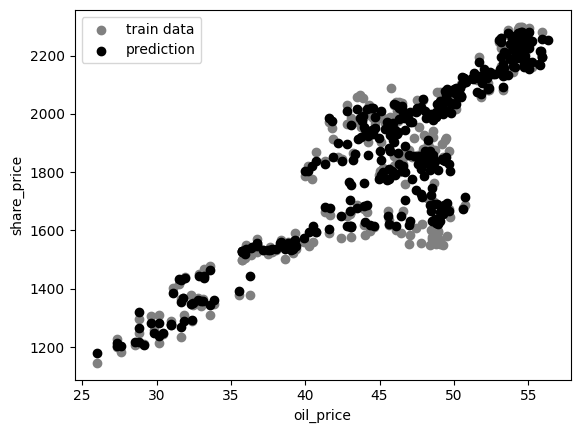

In [29]:
# We are going to have a look at how fitted data looks like:

plt_train=plt.scatter(x_train["oil_price"],y_train,   color='grey')
plt_pred=plt.scatter(shell15["oil_price"], regressor.predict(shell15[["oil_price","PMO.L","CNE.L","FP.PA","ENGI.PA"]]),  color='black')

plt.xlabel("oil_price")
plt.ylabel("share_price")
plt.legend((plt_train,plt_pred),("train data","prediction"))
plt.show()

What did we do here? Can you see a risk of overfitting here?

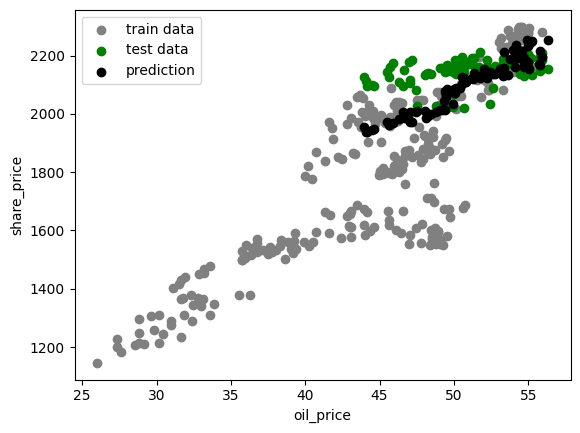

In [30]:
plt_train=plt.scatter(x_train["oil_price"],y_train,   color='grey')
plt_test=plt.scatter(x_test["oil_price"],y_test,   color='green')
plt_pred=plt.scatter(x_test["oil_price"], y_pred,  color='black')

plt.xlabel("oil_price")
plt.ylabel("share_price")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

How would you describe the prediction accuracy of the random forest for this case?

In [31]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

Mean squared error: 2564.58


Compare the mean squared errors of linear regression and random forest.

Feature ranking:
Feature oil_price (0.225776)
Feature PMO.L (0.027248)
Feature CNE.L (0.113487)
Feature FP.PA (0.553113)
Feature ENGI.PA (0.080377)


Text(0, 0.5, 'Importance')

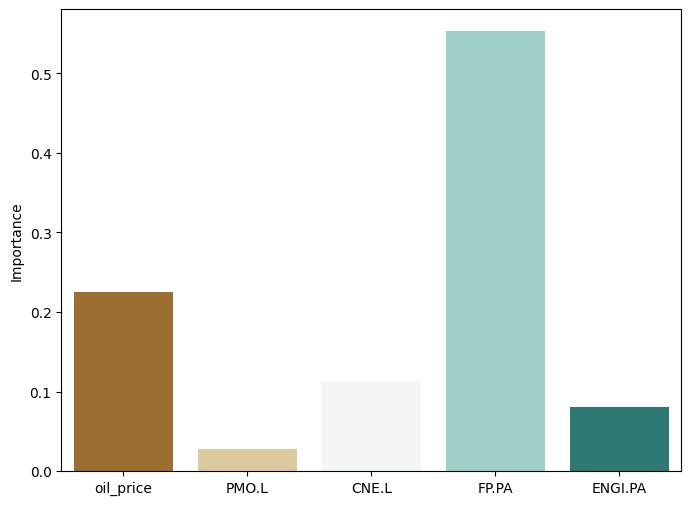

In [32]:
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(x=indices, y=importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

Here, we have plotted information on how important the stock prices of each company were for our prediction. It is interesting the FP.PA (Total oil) is more important than the Brent oil price. What could be the reason for this?